In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
comments = pd.read_csv('GBcomments.csv', error_bad_lines=False)
comments.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


video_id  ... Unnamed: 6
0  jt2OHQh0HoQ  ...        NaN
1  jt2OHQh0HoQ  ...        NaN
2  jt2OHQh0HoQ  ...        NaN
3  jt2OHQh0HoQ  ...        NaN
4  jt2OHQh0HoQ  ...        NaN

[5 rows x 7 columns]

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob("It's more accurate to call it the M+ (1000) be...").sentiment.polarity

0.45000000000000007

In [ ]:
comments = comments.drop(['Unnamed: 4','Unnamed: 5','Unnamed: 6'], axis=1)
comments.head()

video_id                                       comment_text likes replies
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...     0       0
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂     1       0
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...     0       0
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...     0       0
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...     0       0

In [ ]:
TextBlob("Power is the disease.  Care is the cure.  Keep...").sentiment.polarity

0.0

In [ ]:
comments.isnull().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [ ]:
comments.dropna(inplace=True)

In [ ]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [ ]:
polarity = []
for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [ ]:
comments['polarity'] = polarity

In [ ]:
comments.head(20)

video_id  ...  polarity
0   jt2OHQh0HoQ  ...  0.450000
1   jt2OHQh0HoQ  ...  0.000000
2   jt2OHQh0HoQ  ...  0.000000
3   jt2OHQh0HoQ  ...  0.000000
4   jt2OHQh0HoQ  ...  1.000000
5   jt2OHQh0HoQ  ...  0.300000
6   jt2OHQh0HoQ  ...  0.000000
7   jt2OHQh0HoQ  ... -0.100000
8   jt2OHQh0HoQ  ...  0.028571
9   jt2OHQh0HoQ  ...  0.500000
10  jt2OHQh0HoQ  ...  0.500000
11  jt2OHQh0HoQ  ...  0.000000
12  jt2OHQh0HoQ  ...  0.300000
13  jt2OHQh0HoQ  ...  0.026563
14  jt2OHQh0HoQ  ...  0.500000
15  jt2OHQh0HoQ  ...  0.500000
16  jt2OHQh0HoQ  ...  0.200000
17  jt2OHQh0HoQ  ...  0.250000
18  jt2OHQh0HoQ  ...  0.500000
19  jt2OHQh0HoQ  ...  0.300000

[20 rows x 5 columns]

#perform EDA on positive sentiment
#perform EDA on negative sentiment

In [ ]:
comments_positive=comments[comments['polarity']==1]

In [ ]:
comments_positive.shape

(20398, 5)

In [ ]:
comments_positive.head()

video_id  ... polarity
4    jt2OHQh0HoQ  ...      1.0
26   jt2OHQh0HoQ  ...      1.0
80   jt2OHQh0HoQ  ...      1.0
158  YPVcg45W0z4  ...      1.0
175  YPVcg45W0z4  ...      1.0

[5 rows x 5 columns]

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
total_comments = ''.join(comments_positive['comment_text'])

In [ ]:
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

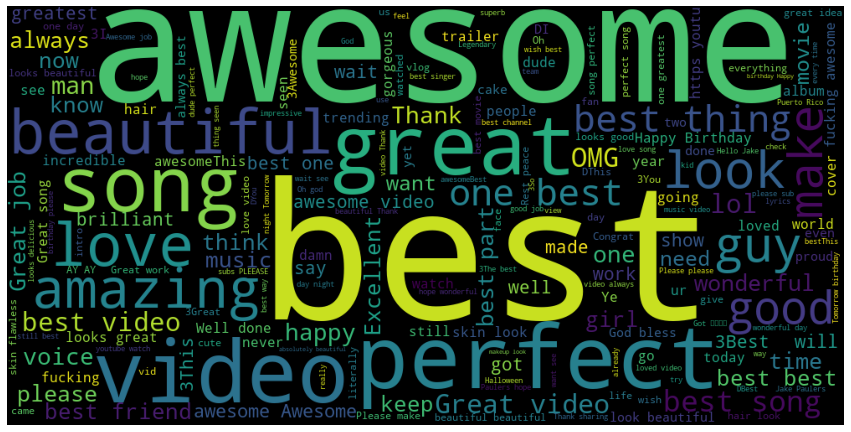

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
comments_negative=comments[comments['polarity']==-1]

In [ ]:
total_comments1 = ''.join(comments_negative['comment_text'])

In [ ]:
wordcloud1 = WordCloud(width=1000, height=500, stopwords=stopwords).generate(total_comments1)

(-0.5, 999.5, 499.5, -0.5)

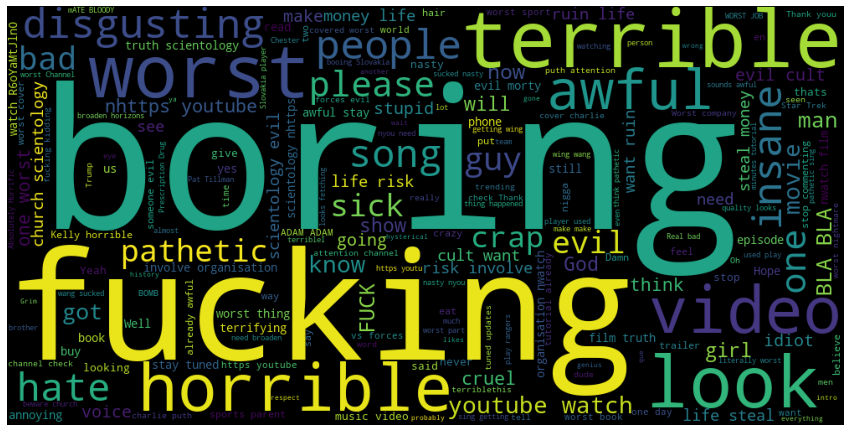

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud1)
plt.axis('off')

#analyzing Tags column, what are the trending tags on youtube?

#perform analysis on likes, views, dislikes and find how they are corelated?

In [ ]:
videos = pd.read_csv('USvideos.csv', error_bad_lines=False)
videos.head()

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id  ...   date
0  XpVt6Z1Gjjo  ...  13.09
1  K4wEI5zhHB0  ...  13.09
2  cLdxuaxaQwc  ...  13.09
3  WYYvHb03Eog  ...  13.09
4  sjlHnJvXdQs  ...  13.09

[5 rows x 11 columns]

In [ ]:
videos['tags']

0       logan paul vlog|logan paul|logan|paul|olympics...
1       Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...
2                                                  [none]
3       apple iphone x hands on|Apple iPhone X|iPhone ...
4       jacksfilms|parody|parodies|iphone|iphone x|iph...
                              ...                        
7987    sinkhole|how do sinkholes form|sinkhole in wat...
7988    Business Insider|Donald Trump|Hillary Clinton|...
7989    LP|Death Valley|Other People|Lost On You|The M...
7990    YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...
7991    LIGO|Virgo|collaboration|space|science|nationa...
Name: tags, Length: 7992, dtype: object

In [ ]:
tags_complete = ' '.join(videos['tags'])

In [ ]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [ ]:
import re

In [ ]:
tags = re.sub('[^a-zA-z]', ' ', tags_complete)

In [ ]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone [none] apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [ ]:
tags = re.sub(' +', ' ', tags)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang life Apple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone [none] apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge verge jacksfilms parody parodies iphone iphone x iphone apple emoji a a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster

In [ ]:
wordcloud2 = WordCloud(width=1000, height=500, stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

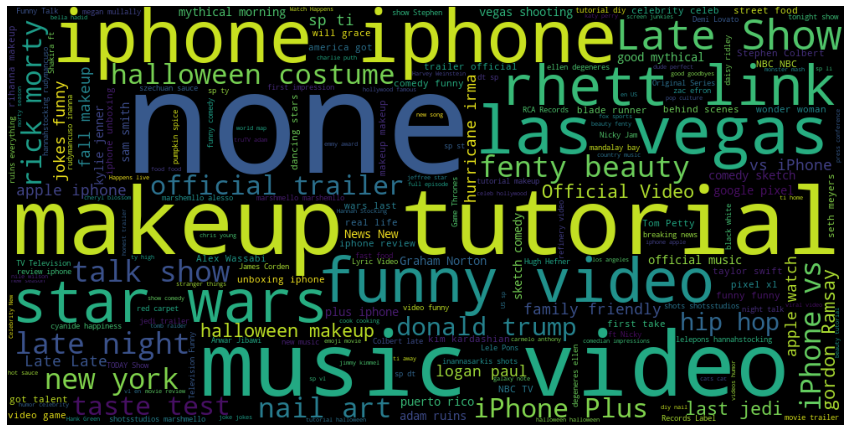

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud2)
plt.axis('off')

Text(0.5, 1.0, 'Regression plot for Views & Likes')

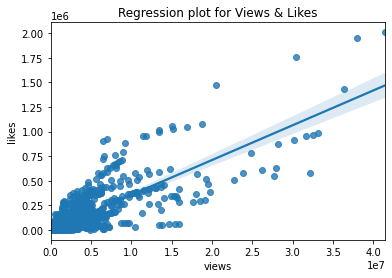

In [ ]:
sns.regplot(data=videos, x='views', y='likes')
plt.title('Regression plot for Views & Likes')

Text(0.5, 1.0, 'Regression plot for Views & DisLikes')

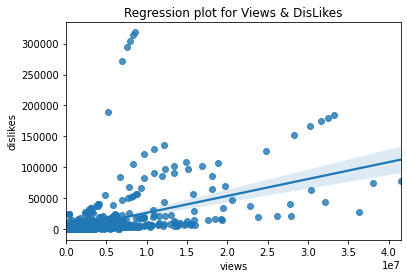

In [ ]:
sns.regplot(data=videos, x='views', y='dislikes')
plt.title('Regression plot for Views & DisLikes')

In [ ]:
df_corr = videos[['views', 'likes', 'dislikes']]

In [ ]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

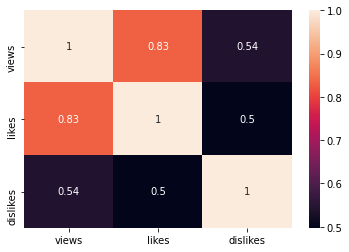

In [ ]:
sns.heatmap(df_corr.corr(), annot=True)

In [ ]:
comments.head()

video_id  ... polarity
0  jt2OHQh0HoQ  ...     0.45
1  jt2OHQh0HoQ  ...     0.00
2  jt2OHQh0HoQ  ...     0.00
3  jt2OHQh0HoQ  ...     0.00
4  jt2OHQh0HoQ  ...     1.00

[5 rows x 5 columns]

In [ ]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [ ]:
print('\U0001F600')

😀


In [ ]:
!pip install emoji

     |████████████████████████████████| 133kB 4.2MB/s 


In [ ]:
import emoji

In [ ]:
len(comments)

718429

In [ ]:
comment=comments['comment_text'][1]

In [ ]:
[c for c in comment if c in emoji.UNICODE_EMOJI]

[]

In [ ]:
str=''
for i in comments['comment_text']:
    list = [c for c in comment if c in emoji.UNICODE_EMOJI]
    for element in list:
        str = str + element

In [ ]:
len(str)

0